In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [2]:
text_file = open("AIerror_ONU16_13S_Ai.txt","r")

In [3]:
lines   = text_file.readlines()
X_train = []
Y_train = []
X_test  = []
Y_test  = []
g       = []
BufferSize = []

In [4]:
timesteps_ = 50

In [5]:
for i in range(len(lines)):
	g.append(float(lines[i]))
for i in range(len(g)):
	if g[i] >= 0:
		BufferSize.append(g[i])

print('max(X_train)  : ',max(BufferSize))
print('min(X_train)  : ',min(BufferSize))

# for i in range(len(BufferSize)):
# 	BufferSize[i] = (BufferSize[i]-min(BufferSize))/max(BufferSize)

max(X_train)  :  535294.0
min(X_train)  :  0.0


In [6]:
[0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142, 0.0008817584355513045, 0.0016925278445116142]

[0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142,
 0.0008817584355513045,
 0.0016925278445116142]

In [7]:
BufferSize = np.array(BufferSize)
print('BufferSize.shape : ',BufferSize.shape)
BufferSize = np.reshape(BufferSize,(BufferSize.shape[0],1)) #(11591,1)
print('BufferSize.shape : ',BufferSize.shape)
BufferSize = sc.fit_transform(BufferSize)
print(BufferSize[0:10])

BufferSize.shape :  (30760,)
BufferSize.shape :  (30760, 1)
[[0.00088176]
 [0.00169253]
 [0.00088176]
 [0.00169253]
 [0.00088176]
 [0.00169253]
 [0.00088176]
 [0.00169253]
 [0.00088176]
 [0.00169253]]


In [8]:
count = int(len(BufferSize)*0.7)
test_count = int(len(BufferSize)) - count
TestSet = BufferSize[count:len(BufferSize), 0]
TestSet = np.reshape(TestSet, (TestSet.shape[0], 1))
for i in range( count - timesteps_): # Change TimeStep
	X_train.append(BufferSize[i:i+timesteps_,0])
	Y_train.append(BufferSize[i+timesteps_,0])
 
for i in range(timesteps_, len(TestSet)):
    X_test.append(TestSet[i-timesteps_:i,0])
for i in range(timesteps_, len(TestSet)):
    Y_test.append(TestSet[i,0])

print('type(X_train) : ',type(X_train))
print('X_train.shape : ',np.shape(X_train))
print('Y_train.shape : ',np.shape(Y_train))

type(X_train) :  <class 'list'>
X_train.shape :  (21482, 50)
Y_train.shape :  (21482,)


In [9]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_test = np.array(Y_test)

In [10]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
Y_train = np.reshape(Y_train,(Y_train.shape[0],1))

In [11]:
X_test.shape

(9178, 50, 1)

In [12]:
inputs = Input(shape=(timesteps_,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((timesteps_,1),input_shape=(timesteps_,))(inputs)

tgt1 = LSTM(units=40,return_sequences = True, input_shape=(timesteps_,1))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

tgt4 = LSTM(units=40)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

predictions = Dense(1)(tgt4)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.3) #[1,0,0], [0,0,1]

Epoch 1/100
470/470 [==============================] - 29s 51ms/step - loss: 0.0183 - mse: 0.0016 - mae: 0.0183 - val_loss: 0.0174 - val_mse: 0.0015 - val_mae: 0.0174
Epoch 2/100
470/470 [==============================] - 22s 46ms/step - loss: 0.0176 - mse: 0.0016 - mae: 0.0176 - val_loss: 0.0166 - val_mse: 0.0015 - val_mae: 0.0166
Epoch 3/100
470/470 [==============================] - 22s 47ms/step - loss: 0.0169 - mse: 0.0016 - mae: 0.0169 - val_loss: 0.0165 - val_mse: 0.0014 - val_mae: 0.0165
Epoch 4/100
470/470 [==============================] - 22s 47ms/step - loss: 0.0165 - mse: 0.0015 - mae: 0.0165 - val_loss: 0.0160 - val_mse: 0.0014 - val_mae: 0.0160
Epoch 5/100
470/470 [==============================] - 22s 48ms/step - loss: 0.0161 - mse: 0.0015 - mae: 0.0161 - val_loss: 0.0153 - val_mse: 0.0014 - val_mae: 0.0153
Epoch 6/100
470/470 [==============================] - 22s 47ms/step - loss: 0.0158 - mse: 0.0015 - mae: 0.0158 - val_loss: 0.0152 - val_mse: 0.0014 - val_mae: 0.015

Epoch 50/100
470/470 [==============================] - 22s 47ms/step - loss: 0.0150 - mse: 0.0014 - mae: 0.0150 - val_loss: 0.0150 - val_mse: 0.0014 - val_mae: 0.0150
Epoch 51/100
470/470 [==============================] - 22s 48ms/step - loss: 0.0150 - mse: 0.0014 - mae: 0.0150 - val_loss: 0.0148 - val_mse: 0.0014 - val_mae: 0.0148
Epoch 52/100
470/470 [==============================] - 22s 47ms/step - loss: 0.0150 - mse: 0.0014 - mae: 0.0150 - val_loss: 0.0148 - val_mse: 0.0014 - val_mae: 0.0148
Epoch 53/100
470/470 [==============================] - 22s 47ms/step - loss: 0.0150 - mse: 0.0014 - mae: 0.0150 - val_loss: 0.0147 - val_mse: 0.0014 - val_mae: 0.0147
Epoch 54/100
470/470 [==============================] - 22s 47ms/step - loss: 0.0149 - mse: 0.0014 - mae: 0.0149 - val_loss: 0.0149 - val_mse: 0.0014 - val_mae: 0.0149
Epoch 55/100
470/470 [==============================] - 22s 47ms/step - loss: 0.0150 - mse: 0.0014 - mae: 0.0150 - val_loss: 0.0148 - val_mse: 0.0014 - val_mae:

In [13]:
 model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 50, 1)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 40)            6720      
_________________________________________________________________
dropout (Dropout)            (None, 50, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 40)            12960 

timesteps :  50
mae  :  0.0002056114561855793


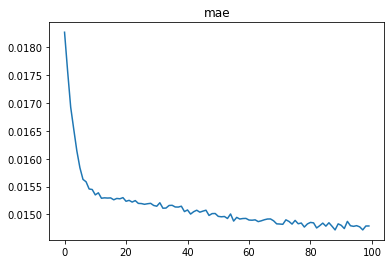

In [14]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mae'])
plt.title('mae')
print('mae  : ',mae(history.history['mae'], history.history['val_mae']))

timesteps :  50


Text(0.5, 1.0, 'mse')

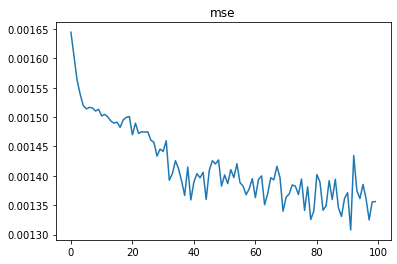

In [15]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mse'])
plt.title('mse')

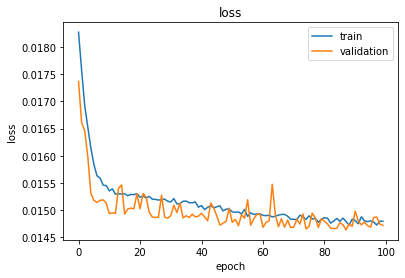

In [16]:
plt.title('loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 5 score: 0.29580929473814854


In [98]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 10 score: 0.4510495347269995


In [115]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 20 score: 0.2875828889832047


In [149]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 30 score: 0.47996248565971134


In [173]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 40 score: 0.36881639399401855


In [17]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 50 score: 0.43443038340011886


In [17]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 70 score: 0.45551531895543185


In [80]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 60 score: 0.4263724829439566


In [156]:
text_file.close()

In [33]:
from sklearn.metrics import r2_score
print("timesteps_:",timesteps_,"score:",r2_score(Y_test, y_pred))

timesteps_: 100 score: 0.20751760436342725


In [117]:
y_pred.shape

(9208, 1)

In [118]:
Y_test.shape

(9208,)